In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize
from scipy.io import loadmat
import matplotlib.gridspec as gridspec
%matplotlib inline

In [2]:
data = loadmat('data/ex5data1.mat')

In [3]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'Xtest', 'ytest', 'Xval', 'yval'])

In [4]:
X_train = np.c_[np.ones((data['X'].shape[0], 1)), data['X']]
y_train = data['y']

In [5]:
X_val =  np.c_[np.ones((data['Xval'].shape[0], 1)), data['Xval']]
y_val = data['yval']

In [6]:
print(f'X_train{X_train.shape}')
print(f'X_val{X_val.shape}')
print(f'y_train{y_train.shape}')
print(f'y_val{y_train.shape}')

X_train(12, 2)
X_val(21, 2)
y_train(12, 1)
y_val(12, 1)


In [7]:
sns.set_style("whitegrid")

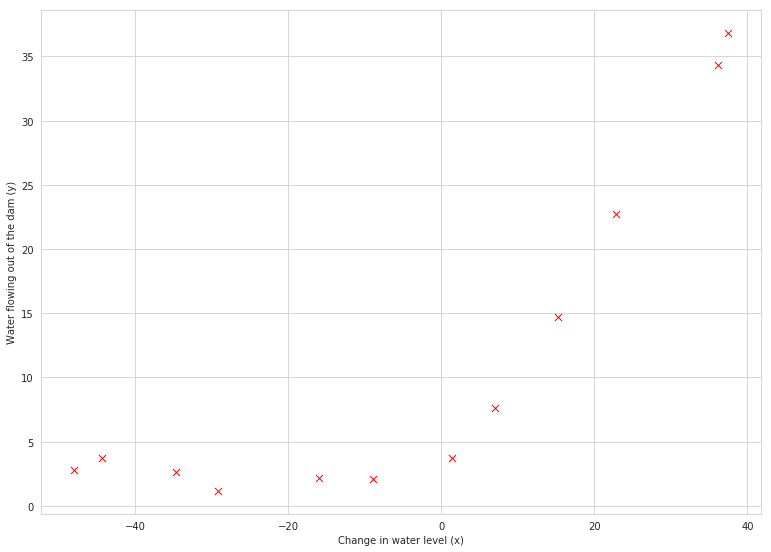

In [8]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
ax.scatter(X_train[:, 1], y_train, s=50, c='r', marker='x', lw=1)
ax.set_xlabel('Change in water level (x)')
ax.set_ylabel('Water flowing out of the dam (y)');

In [49]:
def linear_regression_cost_function(theta, X, y, lmda):
    m, n = X.shape
    h = np.dot(X, theta).reshape((m,1))
    
#     J = (1/(2*m)) * np.sum(np.square(h-y)) + (lmda/(2*m))*np.sum(np.square(theta[1:]))
#     J = (1/(2*m)) * ((h-y).T @ (h-y)).ravel()[0] + (lmda/(2*m))*np.sum(np.square(theta[1:]))
    reg = (float(lmda)/(2*m)) * float(theta[1:].T.dot(theta[1:])) 
    J = float(1./(2*m)) * np.dot((h-y).T, (h-y)) 
    import pdb; pdb.set_trace()
    return J + reg

In [50]:
def linear_regression_gradient(theta, X, y, lmda):
#     import pdb; pdb.set_trace()
    m = y.size
    h = X.dot(theta.reshape(-1, 1))
    
    grad = (1/m) * (X.T.dot(h-y)) + (lmda/m) * np.r_[[[0]], theta[1:].reshape(-1, 1)]
    
    return grad.ravel()

In [52]:
initial_theta = np.array([[1.], [1.]])
cost = linear_regression_cost_function(initial_theta, X_train, y_train, 1.)
gradient = linear_regression_gradient(initial_theta, X_train, y_train, 0)
print(cost)
print(gradient)

> <ipython-input-49-58c37fa477cc>(10)linear_regression_cost_function()
-> return J + reg


(Pdb)  reg


0.041666666666666664


(Pdb)  J


array([[303.95152555]])


(Pdb)  J + reg


array([[303.99319222]])


(Pdb)  np.dot(X, theta).reshape((m,1))


array([[-14.93675813],
       [-28.15297922],
       [ 37.18954863],
       [ 38.49218733],
       [-47.05882945],
       [ -7.94145794],
       [ 16.30779289],
       [-33.70626581],
       [  2.38915437],
       [-43.38375985],
       [  8.01350208],
       [ 23.76274892]])


(Pdb)  np.dot(X, theta)


array([[-14.93675813],
       [-28.15297922],
       [ 37.18954863],
       [ 38.49218733],
       [-47.05882945],
       [ -7.94145794],
       [ 16.30779289],
       [-33.70626581],
       [  2.38915437],
       [-43.38375985],
       [  8.01350208],
       [ 23.76274892]])


(Pdb)  np.dot(X, theta).reshape()


*** TypeError: reshape() takes exactly 1 argument (0 given)


(Pdb)  c


[[303.99319222]]
[-15.30301567 598.16741084]


In [20]:
from scipy.optimize import minimize

In [21]:
def train_linear_reg(X, y, lmda):
    initial_theta = np.array([[15], [15]])
    
    res = minimize(linear_regression_cost_function, initial_theta, args=(X, y, lmda), method=None,
                  jac=linear_regression_gradient, options={'maxiter': 5000})
    return res

In [22]:
fit = train_linear_reg(X_train, y_train, 0)
fit

      fun: 1604.4002999186634
 hess_inv: array([[1.03142187, 0.00617881],
       [0.00617881, 0.001215  ]])
      jac: array([ 3.42437190e-12, -5.70370264e-10])
  message: 'Optimization terminated successfully.'
     nfev: 6
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([13.08790351,  0.36777923])

In [23]:
np.linspace(-50,40)

array([-50.        , -48.16326531, -46.32653061, -44.48979592,
       -42.65306122, -40.81632653, -38.97959184, -37.14285714,
       -35.30612245, -33.46938776, -31.63265306, -29.79591837,
       -27.95918367, -26.12244898, -24.28571429, -22.44897959,
       -20.6122449 , -18.7755102 , -16.93877551, -15.10204082,
       -13.26530612, -11.42857143,  -9.59183673,  -7.75510204,
        -5.91836735,  -4.08163265,  -2.24489796,  -0.40816327,
         1.42857143,   3.26530612,   5.10204082,   6.93877551,
         8.7755102 ,  10.6122449 ,  12.44897959,  14.28571429,
        16.12244898,  17.95918367,  19.79591837,  21.63265306,
        23.46938776,  25.30612245,  27.14285714,  28.97959184,
        30.81632653,  32.65306122,  34.48979592,  36.32653061,
        38.16326531,  40.        ])

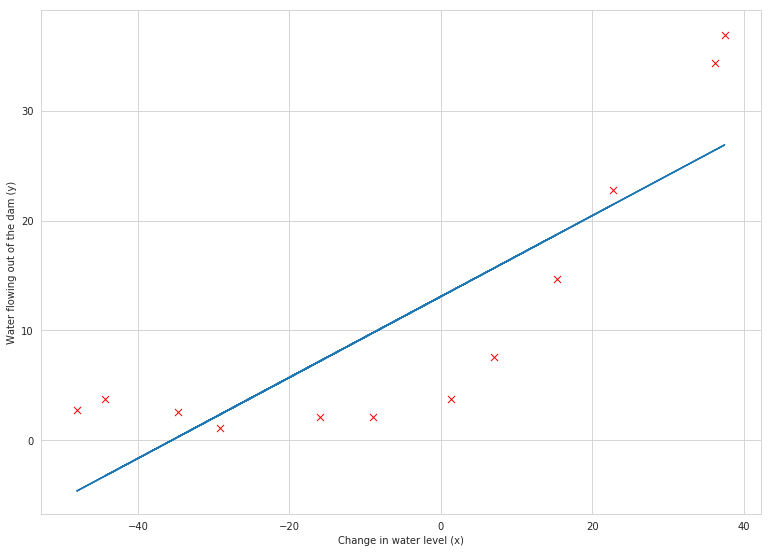

In [24]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(X_train[:, 1], X_train.dot(fit['x']))
ax.scatter(X_train[:, 1], y_train, s=50, c='r', marker='x', lw=1)
ax.set_xlabel('Change in water level (x)')
ax.set_ylabel('Water flowing out of the dam (y)');

In [25]:
def learning_curve(X, y, Xval, yval, lmda):
    m = y.size
    error_train = np.zeros((m, 1))
    error_val = np.zeros((m, 1))
    
    for i in range(m):
        res = train_linear_reg(X[:i+1], y[:i+1], lmda)
        error_train[i] = linear_regression_cost_function(res.x, X[:i+1], y[:i+1], lmda)
        error_val[i] = linear_regression_cost_function(res.x, Xval, yval, lmda)
    return error_train, error_val

In [26]:
t_error, v_error = learning_curve(X_train, y_train, X_val, y_val, 0)

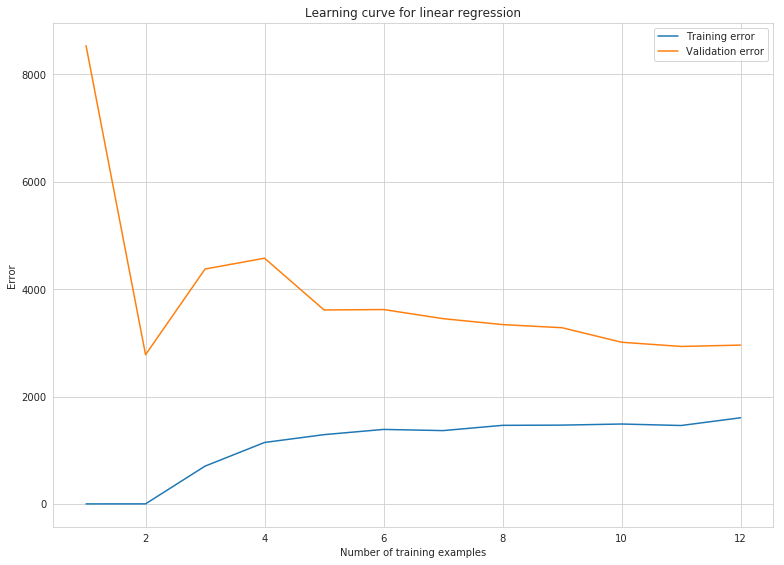

In [27]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_axes([0, 0, 1, 1])

ax.plot(np.arange(1,13), t_error, label='Training error')
ax.plot(np.arange(1,13), v_error, label='Validation error')
ax.set_title('Learning curve for linear regression')
ax.set_xlabel('Number of training examples')
ax.set_ylabel('Error')
ax.legend();

In [78]:
def poly_features(X, degree):
    x_1 = X[1]
    for i in range(2, degree + 1):
        X = np.vstack((X, x_1 ** i))
    return X

In [79]:
def feature_normalize(X):
    X_poly = np.zeros_like(X)
    X_poly[0] = X[0]
    mu = np.mean(X[1:], 1)
    sigma = np.std(X[1:], 1)
    for i, feature in enumerate(X[1:]):
        feature = (feature - mu[i]) / sigma[i]
        X_poly[i + 1] = feature
    return X_poly, mu, sigma

In [84]:
poly_deg = 8
X_poly, mu, sigma = feature_normalize(poly_features(X_train, poly_deg))
X_poly = np.c_[np.ones(X_poly.shape[0]), ]

In [92]:
my_theta = np.ones((X_poly.shape[1], 1))
fit_theta = op

19

In [86]:
X_train

array([[  1.        , -15.93675813],
       [  1.        , -29.15297922],
       [  1.        ,  36.18954863],
       [  1.        ,  37.49218733],
       [  1.        , -48.05882945],
       [  1.        ,  -8.94145794],
       [  1.        ,  15.30779289],
       [  1.        , -34.70626581],
       [  1.        ,   1.38915437],
       [  1.        , -44.38375985],
       [  1.        ,   7.01350208],
       [  1.        ,  22.76274892]])

In [75]:
X_train.shape

(12, 2)

In [96]:
te = np.array([[1, 2], [3, 4]])

In [98]:
v, m = np.linalg.eig(te)

In [101]:
v.argsort()[::-1]

array([1, 0])

In [102]:
m

array([[-0.82456484, -0.41597356],
       [ 0.56576746, -0.90937671]])

In [103]:
m.argsort()[::-1]

array([[1, 0],
       [0, 1]])

In [104]:
m.argsort()

array([[0, 1],
       [1, 0]])

In [ ]:
np.cov